In [1]:
# 필요한 라이브러리를 불러옴
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
import os

In [2]:
# 지정 폴더의 모든 파일을 불러옵니다.
folder = './data/'
files = os.listdir(folder)

In [3]:
# 불러온 csv 파일들을 하나의 DataFrame으로 합치기
df = pd.DataFrame()
for i in files:
    data = pd.read_csv(folder + i)
    df = pd.concat([df,data])
    df = round(df, 2)
df = df.reset_index(drop = True)

In [4]:
# 풀러온 데이터 확인
df

No.  15IV B  16IV G  17IV R  8VF B  9VF G  10VF R  11LMD B  12LMD G  \
0       22102    2.11    8.84    7.05   3.32   3.56    2.39    458.0    524.3   
1       22103    2.06    8.42    7.04   3.20   3.58    2.55    458.2    524.4   
2       22104    2.17    8.89    7.05   3.17   3.71    2.55    458.5    525.0   
3       22105    2.13    8.79    7.19   3.16   3.51    2.59    458.1    524.1   
4       22106    2.13    8.72    7.21   3.11   3.60    2.58    458.0    524.3   
...       ...     ...     ...     ...    ...    ...     ...      ...      ...   
105989  83576    2.01    8.80    7.08   3.36   3.78    2.52    457.2    520.7   
105990  83577    2.13    8.66    6.41   3.16   3.78    2.50    460.0    525.9   
105991  83578    2.09    8.62    6.78   3.32   3.60    2.51    458.3    520.6   
105992  83579    2.08    9.18    6.53   3.46   3.67    2.37    457.7    524.1   
105993  83580    2.08    8.59    6.95   3.32   3.39    2.48    458.0    520.8   

        13LMD R  
0         621.5  
1         621.6  
2         621.5  
3         621.0  
4         620.8  
...         ...  
105989    621.5  
105990    621.9  
105991    622.7  
105992    621.7  
105993    622.2  

[105994 rows x 10 columns]

In [5]:
# 불필요한 column을 삭제. No
df1 = df.drop(columns=["No."])

In [6]:
# 데이터 확인
df1

15IV B  16IV G  17IV R  8VF B  9VF G  10VF R  11LMD B  12LMD G  \
0         2.11    8.84    7.05   3.32   3.56    2.39    458.0    524.3   
1         2.06    8.42    7.04   3.20   3.58    2.55    458.2    524.4   
2         2.17    8.89    7.05   3.17   3.71    2.55    458.5    525.0   
3         2.13    8.79    7.19   3.16   3.51    2.59    458.1    524.1   
4         2.13    8.72    7.21   3.11   3.60    2.58    458.0    524.3   
...        ...     ...     ...    ...    ...     ...      ...      ...   
105989    2.01    8.80    7.08   3.36   3.78    2.52    457.2    520.7   
105990    2.13    8.66    6.41   3.16   3.78    2.50    460.0    525.9   
105991    2.09    8.62    6.78   3.32   3.60    2.51    458.3    520.6   
105992    2.08    9.18    6.53   3.46   3.67    2.37    457.7    524.1   
105993    2.08    8.59    6.95   3.32   3.39    2.48    458.0    520.8   

        13LMD R  
0         621.5  
1         621.6  
2         621.5  
3         621.0  
4         620.8  
...         ...  
105989    621.5  
105990    621.9  
105991    622.7  
105992    621.7  
105993    622.2  

[105994 rows x 9 columns]

In [7]:
# column 이름 재지정
df1.columns = ["IV_B", "IV_G", "IV_R", "VF_B", "VF_G", "VF_R", "WD_B", "WD_G", "WD_R", ]

In [8]:
# 정보 확인
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105994 entries, 0 to 105993
Data columns (total 9 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   IV_B    105994 non-null  float64
 1   IV_G    105994 non-null  float64
 2   IV_R    105994 non-null  float64
 3   VF_B    105994 non-null  float64
 4   VF_G    105994 non-null  float64
 5   VF_R    105994 non-null  float64
 6   WD_B    105994 non-null  float64
 7   WD_G    105994 non-null  float64
 8   WD_R    105994 non-null  float64
dtypes: float64(9)
memory usage: 7.3 MB


In [9]:
# 경측치 제거를 진행 합니다.
df2 = df1.dropna()

In [10]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105994 entries, 0 to 105993
Data columns (total 9 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   IV_B    105994 non-null  float64
 1   IV_G    105994 non-null  float64
 2   IV_R    105994 non-null  float64
 3   VF_B    105994 non-null  float64
 4   VF_G    105994 non-null  float64
 5   VF_R    105994 non-null  float64
 6   WD_B    105994 non-null  float64
 7   WD_G    105994 non-null  float64
 8   WD_R    105994 non-null  float64
dtypes: float64(9)
memory usage: 8.1 MB


In [11]:
df2.describe()

# max = 5, min = 0으로 이상치가 있음을 확인 할수 있음

IV_B           IV_G           IV_R           VF_B  \
count  105994.000000  105994.000000  105994.000000  105994.000000   
mean        2.103912       8.707859       6.775061       3.264251   
std         0.091136       0.395090       0.471764       0.135245   
min         0.000000       0.000000       0.000000       3.030000   
25%         2.050000       8.600000       6.710000       3.160000   
50%         2.100000       8.720000       6.910000       3.240000   
75%         2.140000       8.840000       7.020000       3.350000   
max         2.510000      10.270000       7.430000       5.000000   

                VF_G           VF_R           WD_B           WD_G  \
count  105994.000000  105994.000000  105994.000000  105994.000000   
mean        3.447650       2.428502     457.942794     522.145730   
std         0.143094       0.111373      10.827938      19.304884   
min         3.210000       0.210000       0.000000       0.000000   
25%         3.360000       2.360000     457.700000     521.000000   
50%         3.410000       2.410000     458.000000     523.000000   
75%         3.500000       2.480000     458.500000     524.800000   
max         5.000000       5.000000     460.900000     528.100000   

                WD_R  
count  105994.000000  
mean      621.259409  
std        17.101709  
min         0.000000  
25%       621.100000  
50%       621.500000  
75%       622.100000  
max       626.400000

In [12]:
# 이상값을 결측치로 대체 후 결측치 제거
# 이상갑 확인후 결측치로 대체
quartile_1 = df2[:].quantile(0.25)
quartile_3 = df2[:].quantile(0.75)
IQR = quartile_3 - quartile_1
lls = (quartile_1 - 1.5 * IQR)
hls = (quartile_3 + 1.5 * IQR)
df3 = df2[(df2[:] > lls) & (df2[:] < hls)]
print(df3)

        IV_B  IV_G  IV_R  VF_B  VF_G  VF_R   WD_B   WD_G   WD_R
0       2.11  8.84  7.05  3.32  3.56  2.39  458.0  524.3  621.5
1       2.06  8.42  7.04  3.20  3.58  2.55  458.2  524.4  621.6
2       2.17  8.89  7.05  3.17   NaN  2.55  458.5  525.0  621.5
3       2.13  8.79  7.19  3.16  3.51  2.59  458.1  524.1  621.0
4       2.13  8.72  7.21  3.11  3.60  2.58  458.0  524.3  620.8
...      ...   ...   ...   ...   ...   ...    ...    ...    ...
105989  2.01  8.80  7.08  3.36   NaN  2.52  457.2  520.7  621.5
105990  2.13  8.66  6.41  3.16   NaN  2.50    NaN  525.9  621.9
105991  2.09  8.62  6.78  3.32  3.60  2.51  458.3  520.6  622.7
105992  2.08  9.18  6.53  3.46  3.67  2.37  457.7  524.1  621.7
105993  2.08  8.59  6.95  3.32  3.39  2.48  458.0  520.8  622.2

[105994 rows x 9 columns]


In [13]:
# 이상치가 결측치(NaN)로 대체 된 것을 확인 할 수 잇으며 결측치를 제거합니다.
# 결측치를 제거
df4 = df3.dropna()

In [14]:
# 데이터 확인
df4.describe()

IV_B          IV_G          IV_R          VF_B          VF_G  \
count  83950.000000  83950.000000  83950.000000  83950.000000  83950.000000   
mean       2.097862      8.699992      6.882808      3.263519      3.424299   
std        0.062861      0.178345      0.208147      0.125963      0.097792   
min        1.920000      8.240000      6.250000      3.030000      3.210000   
25%        2.060000      8.590000      6.770000      3.160000      3.360000   
50%        2.090000      8.710000      6.920000      3.240000      3.400000   
75%        2.140000      8.820000      7.030000      3.350000      3.480000   
max        2.270000      9.190000      7.420000      3.630000      3.700000   

               VF_R          WD_B          WD_G          WD_R  
count  83950.000000  83950.000000  83950.000000  83950.000000  
mean       2.416901    458.115172    522.686556    621.515357  
std        0.077189      0.539400      2.127192      0.547647  
min        2.270000    456.900000    518.900000    620.000000  
25%        2.360000    457.700000    520.900000    621.100000  
50%        2.400000    458.000000    521.500000    621.400000  
75%        2.470000    458.400000    524.800000    622.000000  
max        2.650000    459.700000    528.000000    623.500000

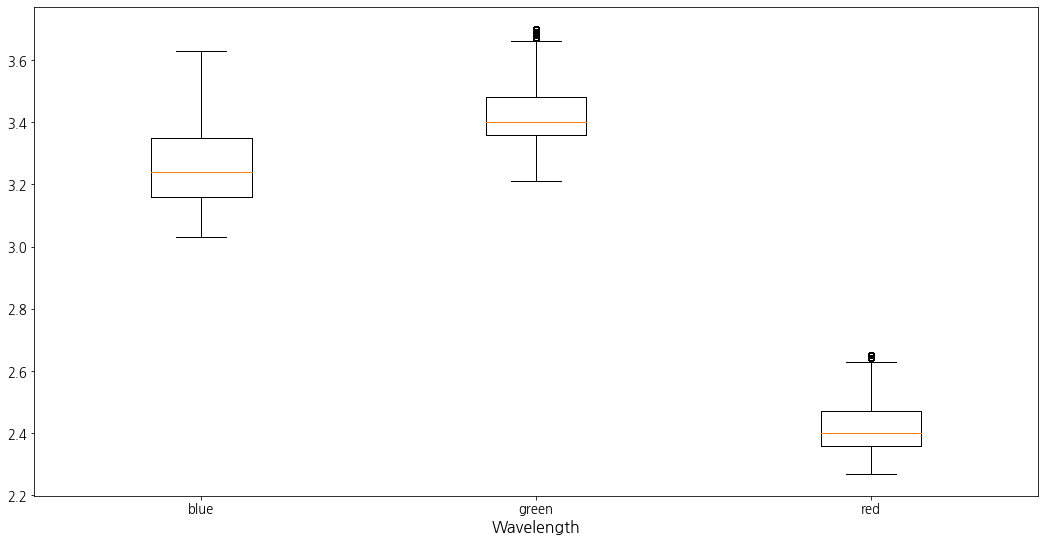

In [15]:
# Data 확인

# VF 특성 상자그림
plt.figure(figsize = (18,9))
plt.boxplot([df4['VF_B'],df4['VF_G'],df4['VF_R']], labels = ['blue','green','red'], vert=True)

plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.xlabel("Wavelength", fontsize = 16)
plt.show()

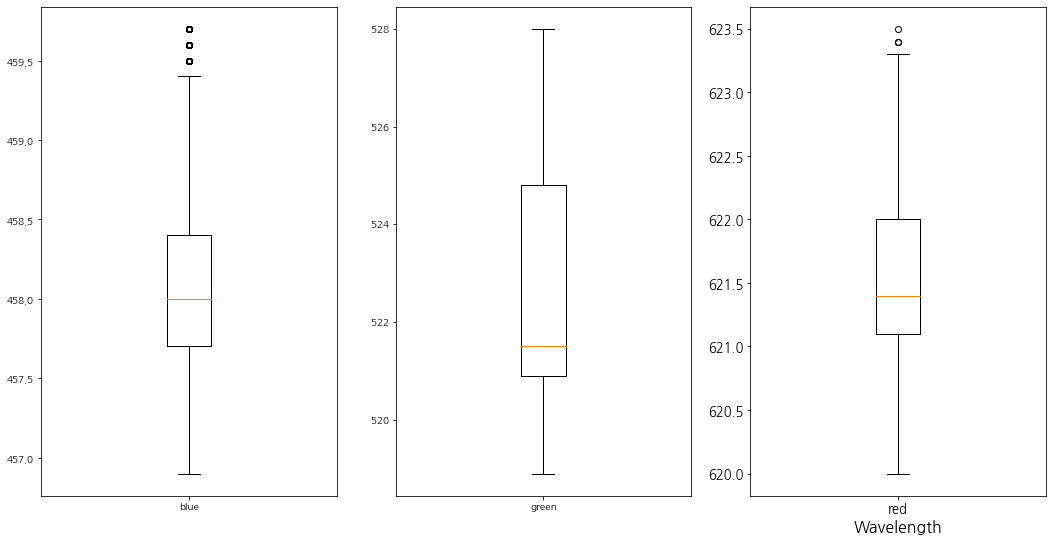

In [16]:
# 파장 특성 상자그림
fig = plt.figure(figsize=(18,9))   # 한 화면의 크기 만들기
ax1 = fig.add_subplot(1,3,1)     # 1행 2열 그림중 1번째
ax2 = fig.add_subplot(1,3,2)     # 1행 2열 그림중 2번째
ax3 = fig.add_subplot(1,3,3)     # 1행 3열 그림중 2번째

ax1.boxplot([df4['WD_B']], labels = ['blue'], vert=True)
ax2.boxplot(df4['WD_G'], labels = ['green'], vert=True)
ax3.boxplot(df4['WD_R'], labels = ['red'], vert=True)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.xlabel("Wavelength", fontsize = 16)
plt.show()

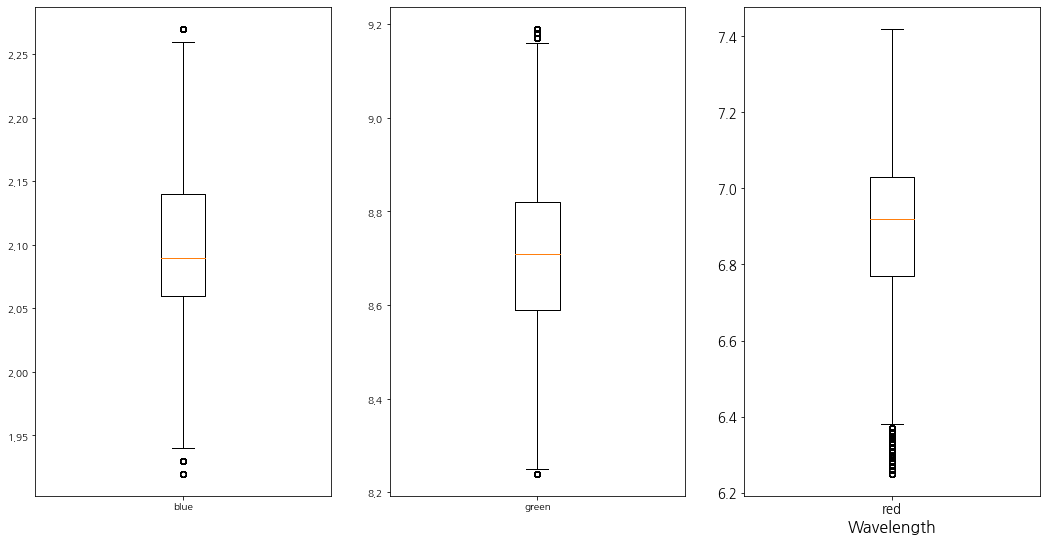

In [17]:
# IV 특성 상자그림
fig = plt.figure(figsize=(18,9))   # 한 화면의 크기 만들기
ax1 = fig.add_subplot(1,3,1)     # 1행 2열 그림중 1번째
ax2 = fig.add_subplot(1,3,2)     # 1행 2열 그림중 2번째
ax3 = fig.add_subplot(1,3,3)     # 1행 3열 그림중 2번째

ax1.boxplot([df4['IV_B']], labels = ['blue'], vert=True)
ax2.boxplot(df4['IV_G'], labels = ['green'], vert=True)
ax3.boxplot(df4['IV_R'], labels = ['red'], vert=True)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.xlabel("Wavelength", fontsize = 16)
plt.show()

In [18]:
from IPython.display import Image

## 공정 능력 확인

#### 공정 능력이란?
 - 공정이 안정된 상태, 관리 상태에 있을 때 그 고정에서 생산되는 제품의 품질 변동이 어느 정도인지를 나타내는 양
 - 공정 능력을 평가 하는 척도로는 공정능력지수 (단기 공정 능력지수 : Cp, Cpk, 장기 공정 능력 지수 : Pp, PpK)가 있음.
 - 공정 능력($6\sigma$)와 Spec.의 범위(T)에 대한 비율 - 공정이 규격 제품을 어느 정도 생산할 능력이 되는지를 나타내는 값.

#### 단기 공정 능력 (Cp, Cpk) ?
 - Cp : Capability of Process
   규격 상한과 규격 하산에 얼마나 촘촘하게 데이터가 생산이 되는지를 측정
    - USL 과 LSL 사이의 범위(T)에 6개의 표준편차가 들어가는 정도가 Cp = 1 이 되고 T를 넘어서면 Cp <1이 됩니다.<br>
   식으로 표현하면
   $$ Cp = \frac{USL - LSL}{6 \times \sigma} $$
   
 - Cpk : Capability of Process, Katayori  (Katayoki는 '한쪽으로 치우침' 이라는 일본어)
   Cp는 측정 데이터의 중심이 USL과 LSL의 중심에 있다는 가정에서 구하는 수치이고 Cpk는 중심이 벋어나는 경우를 고려한 값입니다.
    - 즉 Cp는 치우침이 고려되지 않은 수치, Cpk는 치우침이 고려된 수치입니다.<br>
   식으로 표현하면
   $$ Cp = (1 - K) \times Cp $$
   

#### Cp와 Cpk 비교
![Cp_Cpk 비교](img/01.jpg)

#### 공정능력 지수란?
![공정능력지수](img/02.jpg)

#### 장기 공정 능력 (Pp, Ppk) ?
 - Cp, Cpk는 단기 공정 능력이고 Pp, Ppk는 장기 공정 능력으로 계산 하는 공식은 동일합니다.
 - 차이는
   - 값을 계산할때 Cp는 군내 변동만을 포함하는 표준편차를 사용하는 것이고 
     Pp는 군내와 군간 변동을 모두 도함하는 표준편차를 사용합니다.
     ![단기 장기 고정능력](img/04.jpg)
     

예를 들어 하루 100개씩 생산하는 제품이 있을 때, 10일간의 생산량에 대한 측정 값을 얻으면 1000개의 측정값을 얻을 수 있습니다.<br>
여기서 일별 표준편차의 평균을 $\sigma$값으로 하여 계산한 것이 단기공정능력지수 이고, 1000개의 측정치에 대한 표준편차를 $\sigma$값으로 하여 계산한 것이 장기공정능력지수입니다.

그래서 CP, CPK 의 경우는 공정에 외부의 영향이 없다고 생각되는 짧은 기간의 공정능력을 
PP, PPK는 공정의 외부 영향이 충분히 긴 기간동안의 공정능력을 판단할 때 사용됩니다.

![단기 장기 비교](img/03.jpg)

In [19]:
# 공정 능력 확인을 위한 spec.이 담긴 file을 불러옴
spec = pd.read_csv('./spec/spec.csv')
spec

No. 15IV B  16IV G   17IV R 8VF B 9VF G 10VF R 11LMD B 12LMD G 13LMD R
0  Lower  1.8cd   7.5cd   5.00cd  2.8V  2.8V   1.9V   456nm   519nm   619nm
1  Upper  3.6cd  16.5cd  12.25cd  3.6V  3.6V   2.5V   465nm   533nm   628nm

In [20]:
# 파일에 담진 내용이 샘플 데이터와 옹일해서 불필요한 column을 제거
spec1 = spec.drop(columns=["No."])
spec1

15IV B  16IV G   17IV R 8VF B 9VF G 10VF R 11LMD B 12LMD G 13LMD R
0  1.8cd   7.5cd   5.00cd  2.8V  2.8V   1.9V   456nm   519nm   619nm
1  3.6cd  16.5cd  12.25cd  3.6V  3.6V   2.5V   465nm   533nm   628nm

In [21]:
# column 이름 변경
spec1.columns = ["IV_B", "IV_G", "IV_R", "VF_B", "VF_G", "VF_R", "WD_B", "WD_G", "WD_R" ]
spec1.index = ["LSL", "USL"]
spec1

IV_B    IV_G     IV_R  VF_B  VF_G  VF_R   WD_B   WD_G   WD_R
LSL  1.8cd   7.5cd   5.00cd  2.8V  2.8V  1.9V  456nm  519nm  619nm
USL  3.6cd  16.5cd  12.25cd  3.6V  3.6V  2.5V  465nm  533nm  628nm

In [22]:
# 측정 단위 제거
# 측정 결과에는 단위가 없이 float 형태이므로 동일한 형식으로 맞추기 위해 문자 제거후 float형식으로 변경
spec1[:] = spec1[:].replace('cd', '', regex=True)
spec1[:] = spec1[:].replace('V', '', regex=True)
spec1[:] = spec1[:].replace('nm', '', regex=True)
spec1

IV_B  IV_G   IV_R VF_B VF_G VF_R WD_B WD_G WD_R
LSL  1.8   7.5   5.00  2.8  2.8  1.9  456  519  619
USL  3.6  16.5  12.25  3.6  3.6  2.5  465  533  628

In [23]:
# 공정능력 검토를 위해서는 상한, 하한 spec.과 target value 필요함
# 주어진 자료에 target값이 없으므로 - 임시로 검토 측정 data의 평균값으로 target 값을 대체 - 추가
mean = []
avg = round(df4[:].mean(), 2)
mean.append(avg)
spec1 = spec1.append(mean)
spec1

IV_B  IV_G   IV_R  VF_B  VF_G  VF_R    WD_B    WD_G    WD_R
LSL  1.8   7.5   5.00   2.8   2.8   1.9     456     519     619
USL  3.6  16.5  12.25   3.6   3.6   2.5     465     533     628
0    2.1   8.7   6.88  3.26  3.42  2.42  458.12  522.69  621.52

In [24]:
# 데이터 형태 확인
spec1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3 entries, LSL to 0
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   IV_B    3 non-null      object
 1   IV_G    3 non-null      object
 2   IV_R    3 non-null      object
 3   VF_B    3 non-null      object
 4   VF_G    3 non-null      object
 5   VF_R    3 non-null      object
 6   WD_B    3 non-null      object
 7   WD_G    3 non-null      object
 8   WD_R    3 non-null      object
dtypes: object(9)
memory usage: 240.0+ bytes


In [25]:
# object이므로 float64 형태로 변경 필요
spec1 = spec1[["IV_B", "IV_G", "IV_R", "VF_B", "VF_G", "VF_R", "WD_B", "WD_G", "WD_R" ]] = spec1[["IV_B", "IV_G", "IV_R", "VF_B", "VF_G", "VF_R", "WD_B", "WD_G", "WD_R" ]].apply(pd.to_numeric)
spec1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3 entries, LSL to 0
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   IV_B    3 non-null      float64
 1   IV_G    3 non-null      float64
 2   IV_R    3 non-null      float64
 3   VF_B    3 non-null      float64
 4   VF_G    3 non-null      float64
 5   VF_R    3 non-null      float64
 6   WD_B    3 non-null      float64
 7   WD_G    3 non-null      float64
 8   WD_R    3 non-null      float64
dtypes: float64(9)
memory usage: 240.0+ bytes


In [26]:
# index 이름 변경
spec1.index = ["LSL", "USL", "MEAN"]
spec1

IV_B  IV_G   IV_R  VF_B  VF_G  VF_R    WD_B    WD_G    WD_R
LSL    1.8   7.5   5.00  2.80  2.80  1.90  456.00  519.00  619.00
USL    3.6  16.5  12.25  3.60  3.60  2.50  465.00  533.00  628.00
MEAN   2.1   8.7   6.88  3.26  3.42  2.42  458.12  522.69  621.52

In [27]:
# Spec. data, 검토 data 확인
print(spec1)
print(df4)

      IV_B  IV_G   IV_R  VF_B  VF_G  VF_R    WD_B    WD_G    WD_R
LSL    1.8   7.5   5.00  2.80  2.80  1.90  456.00  519.00  619.00
USL    3.6  16.5  12.25  3.60  3.60  2.50  465.00  533.00  628.00
MEAN   2.1   8.7   6.88  3.26  3.42  2.42  458.12  522.69  621.52
        IV_B  IV_G  IV_R  VF_B  VF_G  VF_R   WD_B   WD_G   WD_R
0       2.11  8.84  7.05  3.32  3.56  2.39  458.0  524.3  621.5
1       2.06  8.42  7.04  3.20  3.58  2.55  458.2  524.4  621.6
3       2.13  8.79  7.19  3.16  3.51  2.59  458.1  524.1  621.0
4       2.13  8.72  7.21  3.11  3.60  2.58  458.0  524.3  620.8
5       2.13  8.92  6.88  3.28  3.42  2.36  458.0  526.2  621.2
...      ...   ...   ...   ...   ...   ...    ...    ...    ...
105987  2.06  8.48  7.01  3.21  3.61  2.35  458.7  523.2  622.0
105988  1.99  8.45  6.80  3.22  3.67  2.50  457.5  520.7  622.5
105991  2.09  8.62  6.78  3.32  3.60  2.51  458.3  520.6  622.7
105992  2.08  9.18  6.53  3.46  3.67  2.37  457.7  524.1  621.7
105993  2.08  8.59  6.95  3.32  

In [28]:
# spec. 을 각각 값으로 분리

# spec. 설정 (min, max, target(mean))
LSL_IB, USL_IB, MEAN_IB = spec1.iat[0,0], spec1.iat[1,0], spec1.iat[2,0]
LSL_IG, USL_IG, MEAN_IG = spec1.iat[0,1], spec1.iat[1,1], spec1.iat[2,1]
LSL_IR, USL_IR, MEAN_IR = spec1.iat[0,2], spec1.iat[1,2], spec1.iat[2,2]
print(LSL_IB, USL_IB, MEAN_IB, LSL_IG, USL_IG, MEAN_IG, LSL_IR, USL_IR, MEAN_IR)

LSL_VB, USL_VB, MEAN_VB = spec1.iat[0,3], spec1.iat[1,3], spec1.iat[2,3]
LSL_VG, USL_VG, MEAN_VG = spec1.iat[0,4], spec1.iat[1,4], spec1.iat[2,4]
LSL_VR, USL_VR, MEAN_VR = spec1.iat[0,5], spec1.iat[1,5], spec1.iat[2,5]
print(LSL_VB, USL_VB, MEAN_VB, LSL_VG, USL_VG, MEAN_VG, LSL_VR, USL_VR, MEAN_VR)

LSL_WB, USL_WB, MEAN_WB = spec1.iat[0,6], spec1.iat[1,6], spec1.iat[2,6]
LSL_WG, USL_WG, MEAN_WG = spec1.iat[0,7], spec1.iat[1,7], spec1.iat[2,7]
LSL_WR, USL_WR, MEAN_WR = spec1.iat[0,8], spec1.iat[1,8], spec1.iat[2,8]
print(LSL_WB, USL_WB, MEAN_WB, LSL_WG, USL_WG, MEAN_WG, LSL_WR, USL_WR, MEAN_WR)

1.8 3.6 2.1 7.5 16.5 8.7 5.0 12.25 6.88
2.8 3.6 3.26 2.8 3.6 3.42 1.9 2.5 2.42
456.0 465.0 458.12 519.0 533.0 522.69 619.0 628.0 621.52


In [29]:
df4.describe()

IV_B          IV_G          IV_R          VF_B          VF_G  \
count  83950.000000  83950.000000  83950.000000  83950.000000  83950.000000   
mean       2.097862      8.699992      6.882808      3.263519      3.424299   
std        0.062861      0.178345      0.208147      0.125963      0.097792   
min        1.920000      8.240000      6.250000      3.030000      3.210000   
25%        2.060000      8.590000      6.770000      3.160000      3.360000   
50%        2.090000      8.710000      6.920000      3.240000      3.400000   
75%        2.140000      8.820000      7.030000      3.350000      3.480000   
max        2.270000      9.190000      7.420000      3.630000      3.700000   

               VF_R          WD_B          WD_G          WD_R  
count  83950.000000  83950.000000  83950.000000  83950.000000  
mean       2.416901    458.115172    522.686556    621.515357  
std        0.077189      0.539400      2.127192      0.547647  
min        2.270000    456.900000    518.900000    620.000000  
25%        2.360000    457.700000    520.900000    621.100000  
50%        2.400000    458.000000    521.500000    621.400000  
75%        2.470000    458.400000    524.800000    622.000000  
max        2.650000    459.700000    528.000000    623.500000

## Blue Chip Sorting 공정 능력 cp, cpk

### Luminous Intensity _ Blue

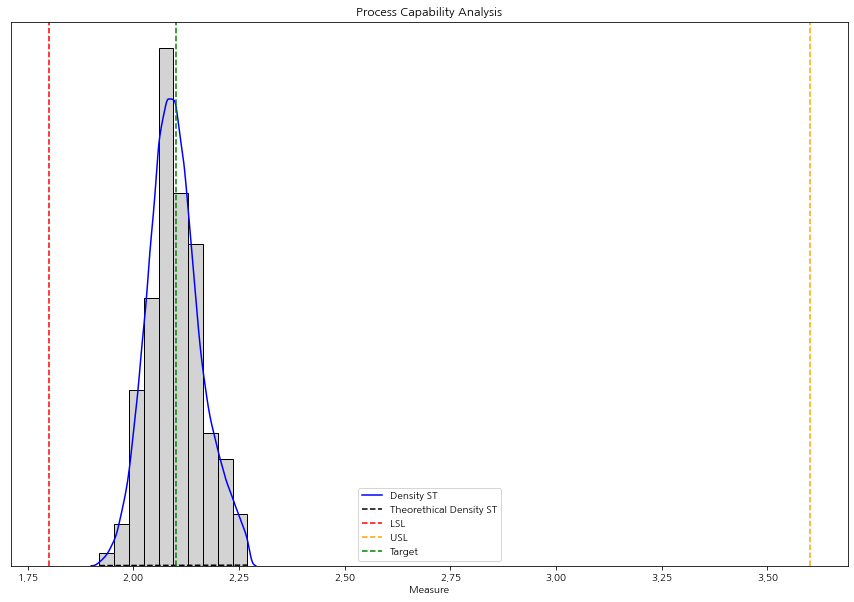

In [30]:
# Generate probability density function 
x = np.linspace((df4['IV_B'].min()), (df4['IV_B'].max()), 1000)
y = norm.pdf(x, loc=5, scale=1)

# Plot histogram for data along with probability density functions and specification limits
plt.figure(figsize=(15,10))
plt.hist(df4['IV_B'], color="lightgrey", edgecolor="black", density=True)
sns.kdeplot(df4['IV_B'], color="blue", label="Density ST")
plt.plot(x, y, linestyle="--", color="black", label="Theorethical Density ST")
plt.axvline(LSL_IB, linestyle="--", color="red", label="LSL")
plt.axvline(USL_IB, linestyle="--", color="orange", label="USL")
plt.axvline(MEAN_IB, linestyle="--", color="green", label="Target")
plt.title('Process Capability Analysis')
plt.xlabel("Measure")
plt.ylabel("")
plt.yticks([])
plt.legend()
plt.show()

In [31]:
# Calculate Cp
Cp = (USL_IB-LSL_IB)/(6*np.std(df4['IV_B']))
# Calculate Cpk
Cpk = min((USL_IB-df4['IV_B'].mean())/(3*df4['IV_B'].std()), (df4['IV_B'].mean()-LSL_IB)/(3*df4['IV_B'].std()))
# Calculate z-value
z = min((USL_IB-df4['IV_B'].mean())/(df4['IV_B'].std()), (df4['IV_B'].mean()-LSL_IB)/(df4['IV_B'].std()))
# Get data summary statistics
num_samples = len(df4['IV_B'])
sample_mean = df4['IV_B'].mean()
sample_std = df4['IV_B'].std()
sample_max = df4['IV_B'].max()
sample_min = df4['IV_B'].min()
sample_median = np.median(df4['IV_B'])

# Get percentage of data points outside of specification limits
pct_below_LSL_IB = len(df4['IV_B'][df4['IV_B'] < LSL_IB])/len(df4['IV_B'])*100
pct_above_USL_IB = len(df4['IV_B'][df4['IV_B'] > USL_IB])/len(df4['IV_B'])*100

# Print results
print("-----------------------------------")
print(f"Specifications")
print(f"Taget: {MEAN_IB}")
print(f"LSL: {LSL_IB}")
print(f"USL: {USL_IB}")    

print("-----------------------------------")
print(f"Indices")
print(f"Cp: {round(Cp,2)}")
print(f"Cpk: {round(Cpk,2)}")
print(f"z: {round(z,2)}")

print("-----------------------------------")
print(f"Summary Statistics")
print(f"Number of samples: {round(num_samples,2)}")
print(f"Sample mean: {round(sample_mean,2)}")
print(f"Sample std: {round(sample_std,2)}")
print(f"Sample max: {round(sample_max,2)}")
print(f"Sample min: {round(sample_min,2)}")
print(f"Sample median: {round(sample_median,2)}")

print(f"Percentage of data points below LSL: {round(pct_below_LSL_IB,2)}%")
print(f"Percentage of data points above USL: {round(pct_above_USL_IB,2)}%")

-----------------------------------
Specifications
Taget: 2.1
LSL: 1.8
USL: 3.6
-----------------------------------
Indices
Cp: 4.77
Cpk: 1.58
z: 4.74
-----------------------------------
Summary Statistics
Number of samples: 83950
Sample mean: 2.1
Sample std: 0.06
Sample max: 2.27
Sample min: 1.92
Sample median: 2.09
Percentage of data points below LSL: 0.0%
Percentage of data points above USL: 0.0%


### Forward Voltage _ Blue

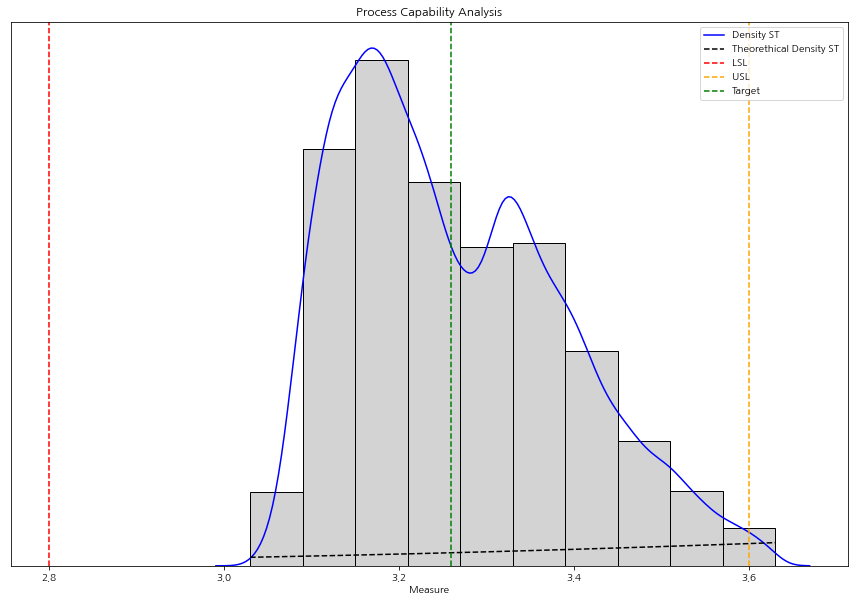

In [32]:
# Blue VF 특성의 공정 능력

# Generate probability density function 
x = np.linspace((df4['VF_B'].min()), (df4['VF_B'].max()), 1000)
y = norm.pdf(x, loc=5, scale=1)

# Plot histogram for data along with probability density functions and specification limits
plt.figure(figsize=(15,10))
plt.hist(df4['VF_B'], color="lightgrey", edgecolor="black", density=True)
sns.kdeplot(df4['VF_B'], color="blue", label="Density ST")
plt.plot(x, y, linestyle="--", color="black", label="Theorethical Density ST")
plt.axvline(LSL_VB, linestyle="--", color="red", label="LSL")
plt.axvline(USL_VB, linestyle="--", color="orange", label="USL")
plt.axvline(MEAN_VB, linestyle="--", color="green", label="Target")
plt.title('Process Capability Analysis')
plt.xlabel("Measure")
plt.ylabel("")
plt.yticks([])
plt.legend()
plt.show()

In [33]:
# Calculate Cp
Cp = (USL_VB-LSL_VB)/(6*np.std(df4['VF_B']))
# Calculate Cpk
Cpk = min((USL_VB-df4['VF_B'].mean())/(3*df4['VF_B'].std()), (df4['VF_B'].mean()-LSL_VB)/(3*df4['VF_B'].std()))
# Calculate z-value
z = min((USL_VB-df4['VF_B'].mean())/(df4['VF_B'].std()), (df4['VF_B'].mean()-LSL_VB)/(df4['VF_B'].std()))

# Get data summary statistics
num_samples = len(df4['VF_B'])
sample_mean = df4['VF_B'].mean()
sample_std = df4['VF_B'].std()
sample_max = df4['VF_B'].max()
sample_min = df4['VF_B'].min()
sample_median = np.median(df4['VF_B'])

# Get percentage of data points outside of specification limits
pct_below_LSL_VB = len(df4['VF_B'][df4['VF_B'] < LSL_VB])/len(df4['VF_B'])*100
pct_above_USL_VB = len(df4['VF_B'][df4['VF_B'] > USL_VB])/len(df4['VF_B'])*100

# Print results
print("-----------------------------------")
print(f"Specifications")
print(f"Taget: {MEAN_VB}")
print(f"LSL: {LSL_VB}")
print(f"USL: {USL_VB}")    

print("-----------------------------------")
print(f"Indices")
print(f"Cp: {round(Cp,2)}")
print(f"Cpk: {round(Cpk,2)}")
print(f"z: {round(z,2)}")

print("-----------------------------------")
print(f"Summary Statistics")
print(f"Number of samples: {round(num_samples,2)}")
print(f"Sample mean: {round(sample_mean,2)}")
print(f"Sample std: {round(sample_std,2)}")
print(f"Sample max: {round(sample_max,2)}")
print(f"Sample min: {round(sample_min,2)}")
print(f"Sample median: {round(sample_median,2)}")

print(f"Percentage of data points below LSL: {round(pct_below_LSL_VB,2)}%")
print(f"Percentage of data points above USL: {round(pct_above_USL_VB,2)}%")

-----------------------------------
Specifications
Taget: 3.26
LSL: 2.8
USL: 3.6
-----------------------------------
Indices
Cp: 1.06
Cpk: 0.89
z: 2.67
-----------------------------------
Summary Statistics
Number of samples: 83950
Sample mean: 3.26
Sample std: 0.13
Sample max: 3.63
Sample min: 3.03
Sample median: 3.24
Percentage of data points below LSL: 0.0%
Percentage of data points above USL: 0.41%


### Wavelenght _ Blue

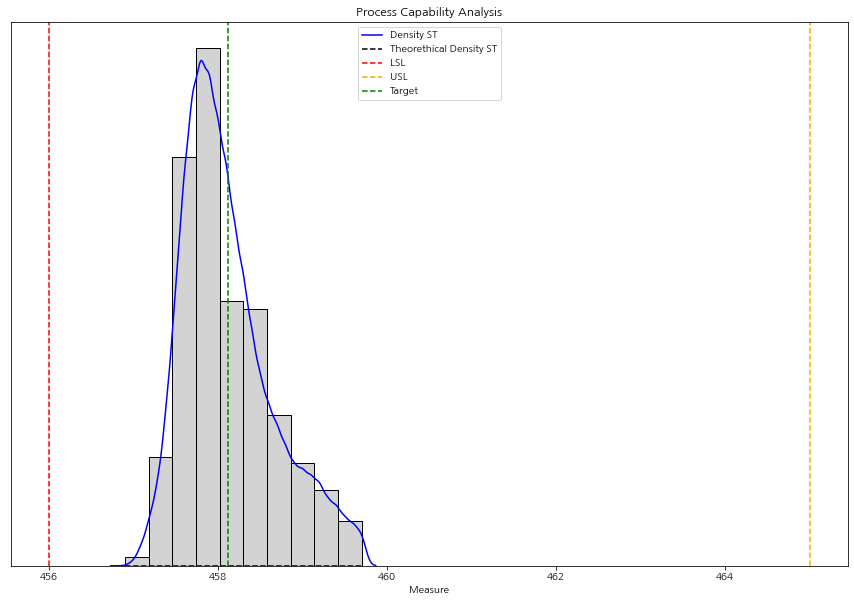

In [34]:
# Blue Wavelength 특성의 공정 능력

# Generate probability density function 
x = np.linspace((df4['WD_B'].min()), (df4['WD_B'].max()), 1000)
y = norm.pdf(x, loc=5, scale=1)

# Plot histogram for data along with probability density functions and specification limits
plt.figure(figsize=(15,10))
plt.hist(df4['WD_B'], color="lightgrey", edgecolor="black", density=True)
sns.kdeplot(df4['WD_B'], color="blue", label="Density ST")
plt.plot(x, y, linestyle="--", color="black", label="Theorethical Density ST")
plt.axvline(LSL_WB, linestyle="--", color="red", label="LSL")
plt.axvline(USL_WB, linestyle="--", color="orange", label="USL")
plt.axvline(MEAN_WB, linestyle="--", color="green", label="Target")
plt.title('Process Capability Analysis')
plt.xlabel("Measure")
plt.ylabel("")
plt.yticks([])
plt.legend()
plt.show()

In [35]:
# Calculate Cp
Cp = (USL_WB-LSL_WB)/(6*np.std(df4['WD_B']))
# Calculate Cpk
Cpk = min((USL_WB-df4['WD_B'].mean())/(3*df4['WD_B'].std()), (df4['WD_B'].mean()-LSL_WB)/(3*df4['WD_B'].std()))
# Calculate z-value
z = min((USL_WB-df4['WD_B'].mean())/(df4['WD_B'].std()), (df4['WD_B'].mean()-LSL_WB)/(df4['WD_B'].std()))
# Get data summary statistics
num_samples = len(df4['WD_B'])
sample_mean = df4['WD_B'].mean()
sample_std = df4['WD_B'].std()
sample_max = df4['WD_B'].max()
sample_min = df4['WD_B'].min()
sample_median = np.median(df4['WD_B'])

# Get percentage of data points outside of specification limits
pct_below_LSL_WB = len(df4['WD_B'][df4['WD_B'] < LSL_WB])/len(df4['WD_B'])*100
pct_above_USL_WB = len(df4['WD_B'][df4['WD_B'] > USL_WB])/len(df4['WD_B'])*100

# Print results
print("-----------------------------------")
print(f"Specifications")
print(f"Taget: {MEAN_WB}")
print(f"LSL: {LSL_WB}")
print(f"USL: {USL_WB}")    

print("-----------------------------------")
print(f"Indices")
print(f"Cp: {round(Cp,2)}")
print(f"Cpk: {round(Cpk,2)}")
print(f"z: {round(z,2)}")

print("-----------------------------------")
print(f"Summary Statistics")
print(f"Number of samples: {round(num_samples,2)}")
print(f"Sample mean: {round(sample_mean,2)}")
print(f"Sample std: {round(sample_std,2)}")
print(f"Sample max: {round(sample_max,2)}")
print(f"Sample min: {round(sample_min,2)}")
print(f"Sample median: {round(sample_median,2)}")

print(f"Percentage of data points below LSL: {round(pct_below_LSL_WB,2)}%")
print(f"Percentage of data points above USL: {round(pct_above_USL_WB,2)}%")

-----------------------------------
Specifications
Taget: 458.12
LSL: 456.0
USL: 465.0
-----------------------------------
Indices
Cp: 2.78
Cpk: 1.31
z: 3.92
-----------------------------------
Summary Statistics
Number of samples: 83950
Sample mean: 458.12
Sample std: 0.54
Sample max: 459.7
Sample min: 456.9
Sample median: 458.0
Percentage of data points below LSL: 0.0%
Percentage of data points above USL: 0.0%


## Green Chip Sorting 공정 능력 cp, cpk

### Luminous Intensity _ Green

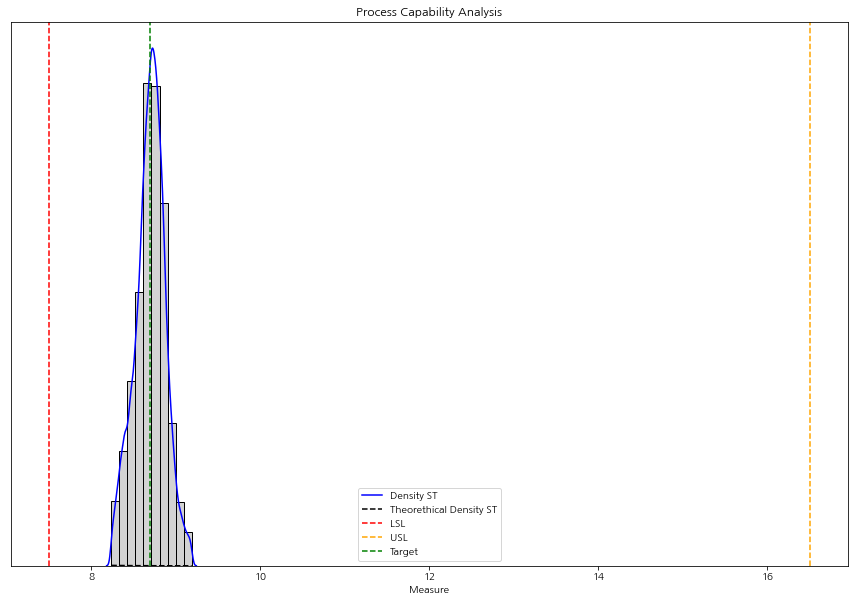

In [36]:
# Generate probability density function 
x = np.linspace((df4['IV_G'].min()), (df4['IV_G'].max()), 1000)
y = norm.pdf(x, loc=5, scale=1)

# Plot histogram for data along with probability density functions and specification limits
plt.figure(figsize=(15,10))
plt.hist(df4['IV_G'], color="lightgrey", edgecolor="black", density=True)
sns.kdeplot(df4['IV_G'], color="blue", label="Density ST")
plt.plot(x, y, linestyle="--", color="black", label="Theorethical Density ST")
plt.axvline(LSL_IG, linestyle="--", color="red", label="LSL")
plt.axvline(USL_IG, linestyle="--", color="orange", label="USL")
plt.axvline(MEAN_IG, linestyle="--", color="green", label="Target")
plt.title('Process Capability Analysis')
plt.xlabel("Measure")
plt.ylabel("")
plt.yticks([])
plt.legend()
plt.show()

In [37]:
# Calculate Cp
Cp = (USL_IG-LSL_IG)/(6*np.std(df4['IV_G']))
# Calculate Cpk
Cpk = min((USL_IG-df4['IV_G'].mean())/(3*df4['IV_G'].std()), (df4['IV_G'].mean()-LSL_IG)/(3*df4['IV_G'].std()))
# Calculate z-value
z = min((USL_IG-df4['IV_G'].mean())/(df4['IV_G'].std()), (df4['IV_G'].mean()-LSL_IG)/(df4['IV_G'].std()))
# Get data summary statistics
num_samples = len(df4['IV_G'])
sample_mean = df4['IV_G'].mean()
sample_std = df4['IV_G'].std()
sample_max = df4['IV_G'].max()
sample_min = df4['IV_G'].min()
sample_median = np.median(df4['IV_G'])

# Get percentage of data points outside of specification limits
pct_below_LSL_IG = len(df4['IV_G'][df4['IV_G'] < LSL_IG])/len(df4['IV_G'])*100
pct_above_USL_IG = len(df4['IV_G'][df4['IV_G'] > USL_IG])/len(df4['IV_G'])*100

# Print results
print("-----------------------------------")
print(f"Specifications")
print(f"Taget: {MEAN_IG}")
print(f"LSL: {LSL_IG}")
print(f"USL: {USL_IG}")    

print("-----------------------------------")
print(f"Indices")
print(f"Cp: {round(Cp,2)}")
print(f"Cpk: {round(Cpk,2)}")
print(f"z: {round(z,2)}")

print("-----------------------------------")
print(f"Summary Statistics")
print(f"Number of samples: {round(num_samples,2)}")
print(f"Sample mean: {round(sample_mean,2)}")
print(f"Sample std: {round(sample_std,2)}")
print(f"Sample max: {round(sample_max,2)}")
print(f"Sample min: {round(sample_min,2)}")
print(f"Sample median: {round(sample_median,2)}")

print(f"Percentage of data points below LSL: {round(pct_below_LSL_IG,2)}%")
print(f"Percentage of data points above USL: {round(pct_above_USL_IG,2)}%")

-----------------------------------
Specifications
Taget: 8.7
LSL: 7.5
USL: 16.5
-----------------------------------
Indices
Cp: 8.41
Cpk: 2.24
z: 6.73
-----------------------------------
Summary Statistics
Number of samples: 83950
Sample mean: 8.7
Sample std: 0.18
Sample max: 9.19
Sample min: 8.24
Sample median: 8.71
Percentage of data points below LSL: 0.0%
Percentage of data points above USL: 0.0%


### Forward Voltage _ Green

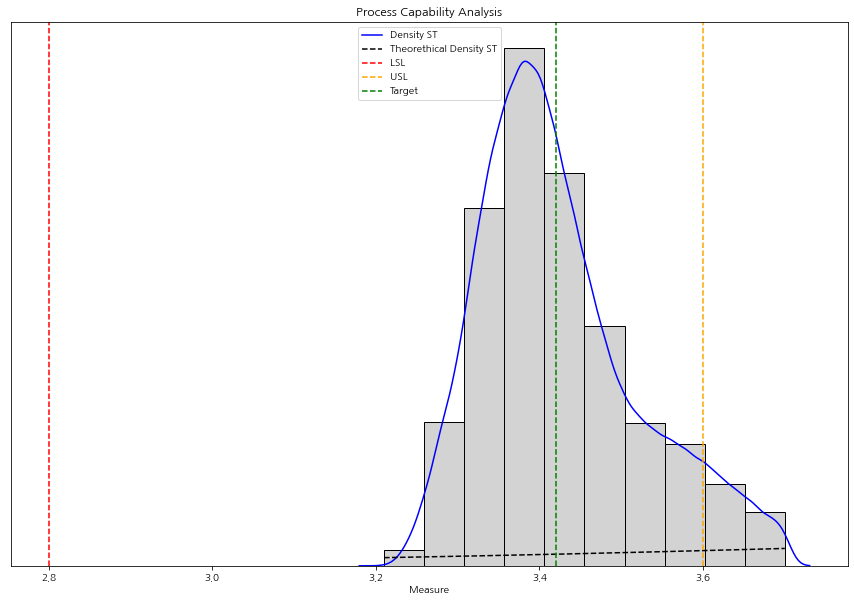

In [38]:
# Blue VF 특성의 공정 능력

# Generate probability density function 
x = np.linspace((df4['VF_G'].min()), (df4['VF_G'].max()), 1000)
y = norm.pdf(x, loc=5, scale=1)

# Plot histogram for data along with probability density functions and specification limits
plt.figure(figsize=(15,10))
plt.hist(df4['VF_G'], color="lightgrey", edgecolor="black", density=True)
sns.kdeplot(df4['VF_G'], color="blue", label="Density ST")
plt.plot(x, y, linestyle="--", color="black", label="Theorethical Density ST")
plt.axvline(LSL_VG, linestyle="--", color="red", label="LSL")
plt.axvline(USL_VG, linestyle="--", color="orange", label="USL")
plt.axvline(MEAN_VG, linestyle="--", color="green", label="Target")
plt.title('Process Capability Analysis')
plt.xlabel("Measure")
plt.ylabel("")
plt.yticks([])
plt.legend()
plt.show()

In [39]:
# Calculate Cp
Cp = (USL_VG-LSL_VG)/(6*np.std(df4['VF_G']))
# Calculate Cpk
Cpk = min((USL_VG-df4['VF_G'].mean())/(3*df4['VF_G'].std()), (df4['VF_G'].mean()-LSL_VG)/(3*df4['VF_G'].std()))
# Calculate z-value
z = min((USL_VG-df4['VF_G'].mean())/(df4['VF_G'].std()), (df4['VF_G'].mean()-LSL_VG)/(df4['VF_G'].std()))

# Get data summary statistics
num_samples = len(df4['VF_G'])
sample_mean = df4['VF_G'].mean()
sample_std = df4['VF_G'].std()
sample_max = df4['VF_G'].max()
sample_min = df4['VF_G'].min()
sample_median = np.median(df4['VF_G'])

# Get percentage of data points outside of specification limits
pct_below_LSL_VG = len(df4['VF_G'][df4['VF_G'] < LSL_VG])/len(df4['VF_G'])*100
pct_above_USL_VG = len(df4['VF_G'][df4['VF_G'] > USL_VG])/len(df4['VF_G'])*100

# Print results
print("-----------------------------------")
print(f"Specifications")
print(f"Taget: {MEAN_VG}")
print(f"LSL: {LSL_VG}")
print(f"USL: {USL_VG}")    

print("-----------------------------------")
print(f"Indices")
print(f"Cp: {round(Cp,2)}")
print(f"Cpk: {round(Cpk,2)}")
print(f"z: {round(z,2)}")

print("-----------------------------------")
print(f"Summary Statistics")
print(f"Number of samples: {round(num_samples,2)}")
print(f"Sample mean: {round(sample_mean,2)}")
print(f"Sample std: {round(sample_std,2)}")
print(f"Sample max: {round(sample_max,2)}")
print(f"Sample min: {round(sample_min,2)}")
print(f"Sample median: {round(sample_median,2)}")

print(f"Percentage of data points below LSL: {round(pct_below_LSL_VG,2)}%")
print(f"Percentage of data points above USL: {round(pct_above_USL_VG,2)}%")

-----------------------------------
Specifications
Taget: 3.42
LSL: 2.8
USL: 3.6
-----------------------------------
Indices
Cp: 1.36
Cpk: 0.6
z: 1.8
-----------------------------------
Summary Statistics
Number of samples: 83950
Sample mean: 3.42
Sample std: 0.1
Sample max: 3.7
Sample min: 3.21
Sample median: 3.4
Percentage of data points below LSL: 0.0%
Percentage of data points above USL: 6.6%


### Wavelenght _ Green

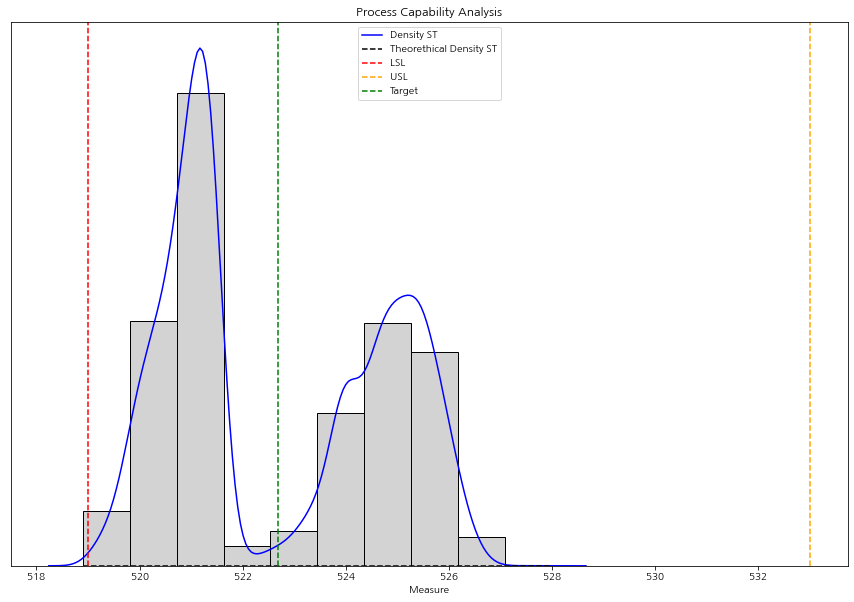

In [40]:
# Blue Wavelength 특성의 공정 능력

# Generate probability density function 
x = np.linspace((df4['WD_G'].min()), (df4['WD_G'].max()), 1000)
y = norm.pdf(x, loc=5, scale=1)

# Plot histogram for data along with probability density functions and specification limits
plt.figure(figsize=(15,10))
plt.hist(df4['WD_G'], color="lightgrey", edgecolor="black", density=True)
sns.kdeplot(df4['WD_G'], color="blue", label="Density ST")
plt.plot(x, y, linestyle="--", color="black", label="Theorethical Density ST")
plt.axvline(LSL_WG, linestyle="--", color="red", label="LSL")
plt.axvline(USL_WG, linestyle="--", color="orange", label="USL")
plt.axvline(MEAN_WG, linestyle="--", color="green", label="Target")
plt.title('Process Capability Analysis')
plt.xlabel("Measure")
plt.ylabel("")
plt.yticks([])
plt.legend()
plt.show()

In [41]:
# Calculate Cp
Cp = (USL_WG-LSL_WG)/(6*np.std(df4['WD_G']))
# Calculate Cpk
Cpk = min((USL_WG-df4['WD_G'].mean())/(3*df4['WD_G'].std()), (df4['WD_G'].mean()-LSL_WG)/(3*df4['WD_G'].std()))
# Calculate z-value
z = min((USL_WG-df4['WD_G'].mean())/(df4['WD_G'].std()), (df4['WD_G'].mean()-LSL_WG)/(df4['WD_G'].std()))
# Get data summary statistics
num_samples = len(df4['WD_G'])
sample_mean = df4['WD_G'].mean()
sample_std = df4['WD_G'].std()
sample_max = df4['WD_G'].max()
sample_min = df4['WD_G'].min()
sample_median = np.median(df4['WD_G'])

# Get percentage of data points outside of specification limits
pct_below_LSL_WG = len(df4['WD_G'][df4['WD_G'] < LSL_WG])/len(df4['WD_G'])*100
pct_above_USL_WG = len(df4['WD_G'][df4['WD_G'] > USL_WG])/len(df4['WD_G'])*100

# Print results
print("-----------------------------------")
print(f"Specifications")
print(f"Taget: {MEAN_WG}")
print(f"LSL: {LSL_WG}")
print(f"USL: {USL_WG}")    

print("-----------------------------------")
print(f"Indices")
print(f"Cp: {round(Cp,2)}")
print(f"Cpk: {round(Cpk,2)}")
print(f"z: {round(z,2)}")

print("-----------------------------------")
print(f"Summary Statistics")
print(f"Number of samples: {round(num_samples,2)}")
print(f"Sample mean: {round(sample_mean,2)}")
print(f"Sample std: {round(sample_std,2)}")
print(f"Sample max: {round(sample_max,2)}")
print(f"Sample min: {round(sample_min,2)}")
print(f"Sample median: {round(sample_median,2)}")

print(f"Percentage of data points below LSL: {round(pct_below_LSL_WG,2)}%")
print(f"Percentage of data points above USL: {round(pct_above_USL_WG,2)}%")

-----------------------------------
Specifications
Taget: 522.69
LSL: 519.0
USL: 533.0
-----------------------------------
Indices
Cp: 1.1
Cpk: 0.58
z: 1.73
-----------------------------------
Summary Statistics
Number of samples: 83950
Sample mean: 522.69
Sample std: 2.13
Sample max: 528.0
Sample min: 518.9
Sample median: 521.5
Percentage of data points below LSL: 0.01%
Percentage of data points above USL: 0.0%


## Red Chip Sorting 공정 능력 cp, cpk

### Luminous Intensity _ Red

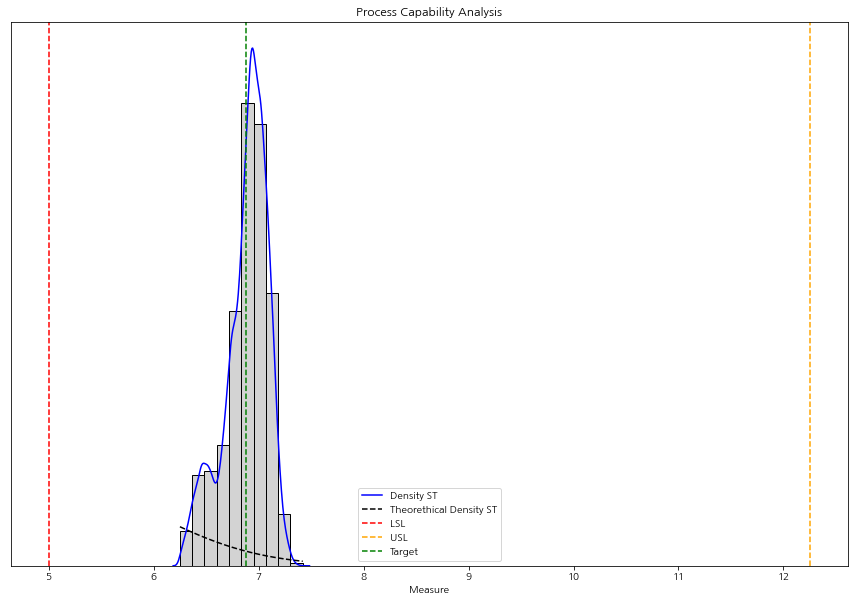

In [42]:
# Generate probability density function 
x = np.linspace((df4['IV_R'].min()), (df4['IV_R'].max()), 1000)
y = norm.pdf(x, loc=5, scale=1)

# Plot histogram for data along with probability density functions and specification limits
plt.figure(figsize=(15,10))
plt.hist(df4['IV_R'], color="lightgrey", edgecolor="black", density=True)
sns.kdeplot(df4['IV_R'], color="blue", label="Density ST")
plt.plot(x, y, linestyle="--", color="black", label="Theorethical Density ST")
plt.axvline(LSL_IR, linestyle="--", color="red", label="LSL")
plt.axvline(USL_IR, linestyle="--", color="orange", label="USL")
plt.axvline(MEAN_IR, linestyle="--", color="green", label="Target")
plt.title('Process Capability Analysis')
plt.xlabel("Measure")
plt.ylabel("")
plt.yticks([])
plt.legend()
plt.show()

In [43]:
# Calculate Cp
Cp = (USL_IR-LSL_IR)/(6*np.std(df4['IV_R']))
# Calculate Cpk
Cpk = min((USL_IR-df4['IV_R'].mean())/(3*df4['IV_R'].std()), (df4['IV_R'].mean()-LSL_IR)/(3*df4['IV_R'].std()))
# Calculate z-value
z = min((USL_IR-df4['IV_R'].mean())/(df4['IV_R'].std()), (df4['IV_R'].mean()-LSL_IR)/(df4['IV_R'].std()))
# Get data summary statistics
num_samples = len(df4['IV_R'])
sample_mean = df4['IV_R'].mean()
sample_std = df4['IV_R'].std()
sample_max = df4['IV_R'].max()
sample_min = df4['IV_R'].min()
sample_median = np.median(df4['IV_B'])

# Get percentage of data points outside of specification limits
pct_below_LSL_IR = len(df4['IV_R'][df4['IV_R'] < LSL_IR])/len(df4['IV_R'])*100
pct_above_USL_IR = len(df4['IV_R'][df4['IV_R'] > USL_IR])/len(df4['IV_R'])*100

# Print results
print("-----------------------------------")
print(f"Specifications")
print(f"Taget: {MEAN_IR}")
print(f"LSL: {LSL_IR}")
print(f"USL: {USL_IR}")    

print("-----------------------------------")
print(f"Indices")
print(f"Cp: {round(Cp,2)}")
print(f"Cpk: {round(Cpk,2)}")
print(f"z: {round(z,2)}")

print("-----------------------------------")
print(f"Summary Statistics")
print(f"Number of samples: {round(num_samples,2)}")
print(f"Sample mean: {round(sample_mean,2)}")
print(f"Sample std: {round(sample_std,2)}")
print(f"Sample max: {round(sample_max,2)}")
print(f"Sample min: {round(sample_min,2)}")
print(f"Sample median: {round(sample_median,2)}")

print(f"Percentage of data points below LSL: {round(pct_below_LSL_IR,2)}%")
print(f"Percentage of data points above USL: {round(pct_above_USL_IR,2)}%")

-----------------------------------
Specifications
Taget: 6.88
LSL: 5.0
USL: 12.25
-----------------------------------
Indices
Cp: 5.81
Cpk: 3.02
z: 9.05
-----------------------------------
Summary Statistics
Number of samples: 83950
Sample mean: 6.88
Sample std: 0.21
Sample max: 7.42
Sample min: 6.25
Sample median: 2.09
Percentage of data points below LSL: 0.0%
Percentage of data points above USL: 0.0%


### Forward Voltage _ Red

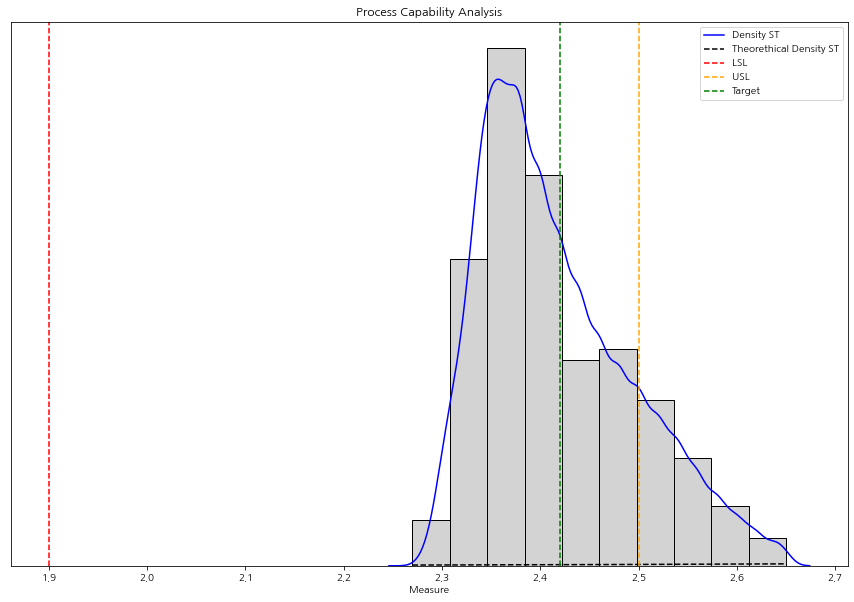

In [44]:
# Blue VF 특성의 공정 능력

# Generate probability density function 
x = np.linspace((df4['VF_R'].min()), (df4['VF_R'].max()), 1000)
y = norm.pdf(x, loc=5, scale=1)

# Plot histogram for data along with probability density functions and specification limits
plt.figure(figsize=(15,10))
plt.hist(df4['VF_R'], color="lightgrey", edgecolor="black", density=True)
sns.kdeplot(df4['VF_R'], color="blue", label="Density ST")
plt.plot(x, y, linestyle="--", color="black", label="Theorethical Density ST")
plt.axvline(LSL_VR, linestyle="--", color="red", label="LSL")
plt.axvline(USL_VR, linestyle="--", color="orange", label="USL")
plt.axvline(MEAN_VR, linestyle="--", color="green", label="Target")
plt.title('Process Capability Analysis')
plt.xlabel("Measure")
plt.ylabel("")
plt.yticks([])
plt.legend()
plt.show()

In [45]:
# Calculate Cp
Cp = (USL_VR-LSL_VR)/(6*np.std(df4['VF_R']))
# Calculate Cpk
Cpk = min((USL_VR-df4['VF_R'].mean())/(3*df4['VF_R'].std()), (df4['VF_R'].mean()-LSL_VR)/(3*df4['VF_R'].std()))
# Calculate z-value
z = min((USL_VR-df4['VF_R'].mean())/(df4['VF_R'].std()), (df4['VF_R'].mean()-LSL_VR)/(df4['VF_R'].std()))

# Get data summary statistics
num_samples = len(df4['VF_R'])
sample_mean = df4['VF_R'].mean()
sample_std = df4['VF_R'].std()
sample_max = df4['VF_R'].max()
sample_min = df4['VF_R'].min()
sample_median = np.median(df4['VF_R'])

# Get percentage of data points outside of specification limits
pct_below_LSL_VR = len(df4['VF_R'][df4['VF_R'] < LSL_VR])/len(df4['VF_R'])*100
pct_above_USL_VR = len(df4['VF_R'][df4['VF_R'] > USL_VR])/len(df4['VF_R'])*100

# Print results
print("-----------------------------------")
print(f"Specifications")
print(f"Taget: {MEAN_VR}")
print(f"LSL: {LSL_VR}")
print(f"USL: {USL_VR}")    

print("-----------------------------------")
print(f"Indices")
print(f"Cp: {round(Cp,2)}")
print(f"Cpk: {round(Cpk,2)}")
print(f"z: {round(z,2)}")

print("-----------------------------------")
print(f"Summary Statistics")
print(f"Number of samples: {round(num_samples,2)}")
print(f"Sample mean: {round(sample_mean,2)}")
print(f"Sample std: {round(sample_std,2)}")
print(f"Sample max: {round(sample_max,2)}")
print(f"Sample min: {round(sample_min,2)}")
print(f"Sample median: {round(sample_median,2)}")

print(f"Percentage of data points below LSL: {round(pct_below_LSL_VR,2)}%")
print(f"Percentage of data points above USL: {round(pct_above_USL_VR,2)}%")

-----------------------------------
Specifications
Taget: 2.42
LSL: 1.9
USL: 2.5
-----------------------------------
Indices
Cp: 1.3
Cpk: 0.36
z: 1.08
-----------------------------------
Summary Statistics
Number of samples: 83950
Sample mean: 2.42
Sample std: 0.08
Sample max: 2.65
Sample min: 2.27
Sample median: 2.4
Percentage of data points below LSL: 0.0%
Percentage of data points above USL: 15.11%


### Wavelenght _ Red

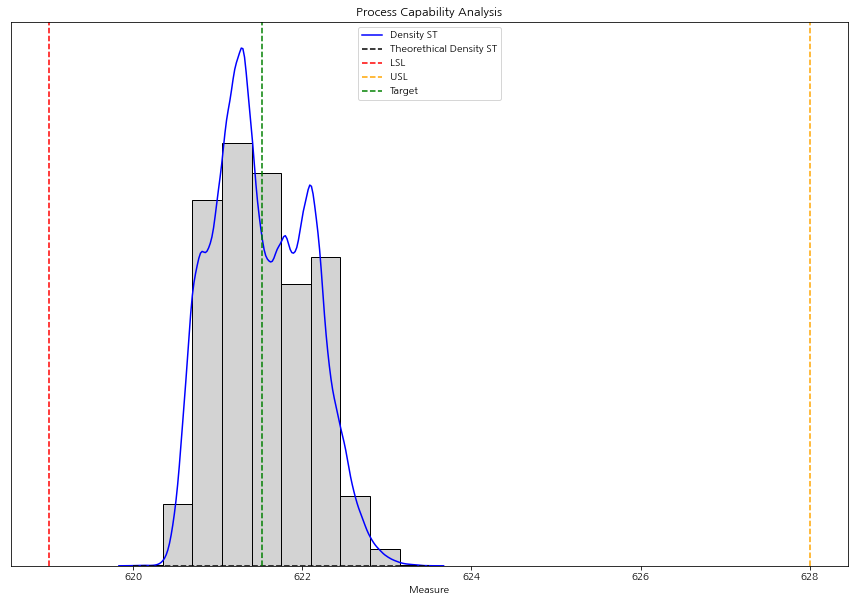

In [46]:
# Blue Wavelength 특성의 공정 능력

# Generate probability density function 
x = np.linspace((df4['WD_R'].min()), (df4['WD_R'].max()), 1000)
y = norm.pdf(x, loc=5, scale=1)

# Plot histogram for data along with probability density functions and specification limits
plt.figure(figsize=(15,10))
plt.hist(df4['WD_R'], color="lightgrey", edgecolor="black", density=True)
sns.kdeplot(df4['WD_R'], color="blue", label="Density ST")
plt.plot(x, y, linestyle="--", color="black", label="Theorethical Density ST")
plt.axvline(LSL_WR, linestyle="--", color="red", label="LSL")
plt.axvline(USL_WR, linestyle="--", color="orange", label="USL")
plt.axvline(MEAN_WR, linestyle="--", color="green", label="Target")
plt.title('Process Capability Analysis')
plt.xlabel("Measure")
plt.ylabel("")
plt.yticks([])
plt.legend()
plt.show()

In [47]:
# Calculate Cp
Cp = (USL_WR-LSL_WR)/(6*np.std(df4['WD_R']))
# Calculate Cpk
Cpk = min((USL_WR-df4['WD_R'].mean())/(3*df4['WD_R'].std()), (df4['WD_R'].mean()-LSL_WR)/(3*df4['WD_R'].std()))
# Calculate z-value
z = min((USL_WR-df4['WD_R'].mean())/(df4['WD_R'].std()), (df4['WD_R'].mean()-LSL_WR)/(df4['WD_R'].std()))
# Get data summary statistics
num_samples = len(df4['WD_R'])
sample_mean = df4['WD_R'].mean()
sample_std = df4['WD_R'].std()
sample_max = df4['WD_R'].max()
sample_min = df4['WD_R'].min()
sample_median = np.median(df4['WD_R'])

# Get percentage of data points outside of specification limits
pct_below_LSL_WR = len(df4['WD_R'][df4['WD_R'] < LSL_WR])/len(df4['WD_R'])*100
pct_above_USL_WR = len(df4['WD_R'][df4['WD_R'] > USL_WR])/len(df4['WD_R'])*100

# Print results
print("-----------------------------------")
print(f"Specifications")
print(f"Taget: {MEAN_WR}")
print(f"LSL: {LSL_WR}")
print(f"USL: {USL_WR}")    

print("-----------------------------------")
print(f"Indices")
print(f"Cp: {round(Cp,2)}")
print(f"Cpk: {round(Cpk,2)}")
print(f"z: {round(z,2)}")

print("-----------------------------------")
print(f"Summary Statistics")
print(f"Number of samples: {round(num_samples,2)}")
print(f"Sample mean: {round(sample_mean,2)}")
print(f"Sample std: {round(sample_std,2)}")
print(f"Sample max: {round(sample_max,2)}")
print(f"Sample min: {round(sample_min,2)}")
print(f"Sample median: {round(sample_median,2)}")

print(f"Percentage of data points below LSL: {round(pct_below_LSL_WR,2)}%")
print(f"Percentage of data points above USL: {round(pct_above_USL_WR,2)}%")

-----------------------------------
Specifications
Taget: 621.52
LSL: 619.0
USL: 628.0
-----------------------------------
Indices
Cp: 2.74
Cpk: 1.53
z: 4.59
-----------------------------------
Summary Statistics
Number of samples: 83950
Sample mean: 621.52
Sample std: 0.55
Sample max: 623.5
Sample min: 620.0
Sample median: 621.4
Percentage of data points below LSL: 0.0%
Percentage of data points above USL: 0.0%
